In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer  # Import yellowbrick
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

import warnings
warnings.filterwarnings('ignore')


In [23]:
wine_data = pd.read_csv("C:\kirti\wine.csv")
wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


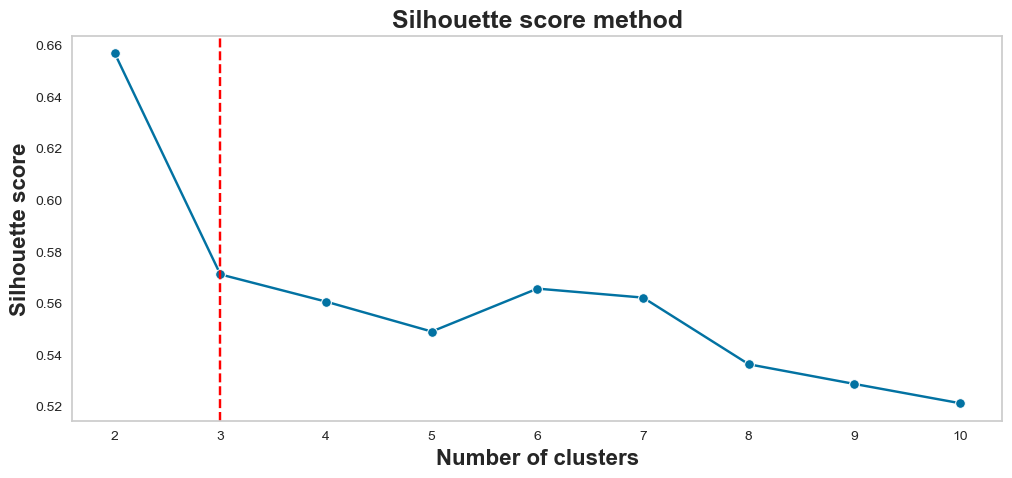

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# List of number of clusters to evaluate
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Lists to store inertia and silhouette scores for each number of clusters
clusters_inertia = []
s_scores = []

# Loop through each number of clusters and compute inertia and silhouette score
for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(wine_data)
    clusters_inertia.append(KM_est.inertia_)    # Data for the elbow method
    silhouette_avg = silhouette_score(wine_data, KM_est.labels_)
    s_scores.append(silhouette_avg) # Data for the silhouette score method

# Create the plot
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method", fontweight='bold', fontsize=18)
ax.set_xlabel("Number of clusters", fontweight='bold', fontsize=16)
ax.set_ylabel("Silhouette score", fontweight='bold', fontsize=16)
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()


Elbow Plot for Standard Scaler data


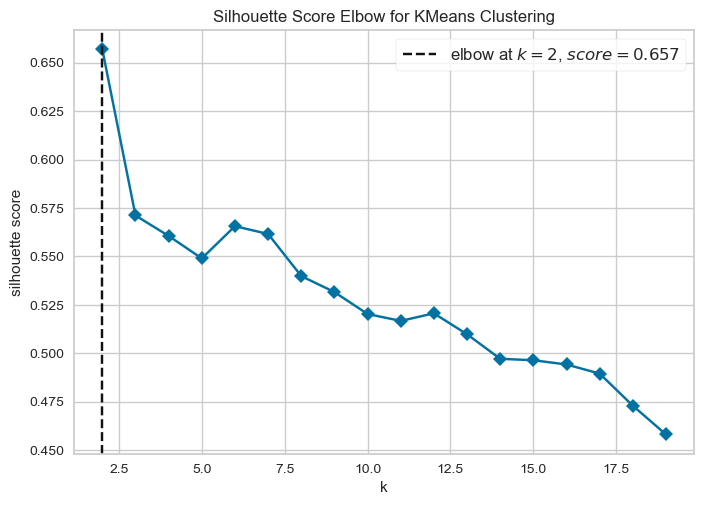

In [25]:
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for Standard Scaler data')
visualizer.fit(wine_data)    
visualizer.show()
plt.show()

In [26]:
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans

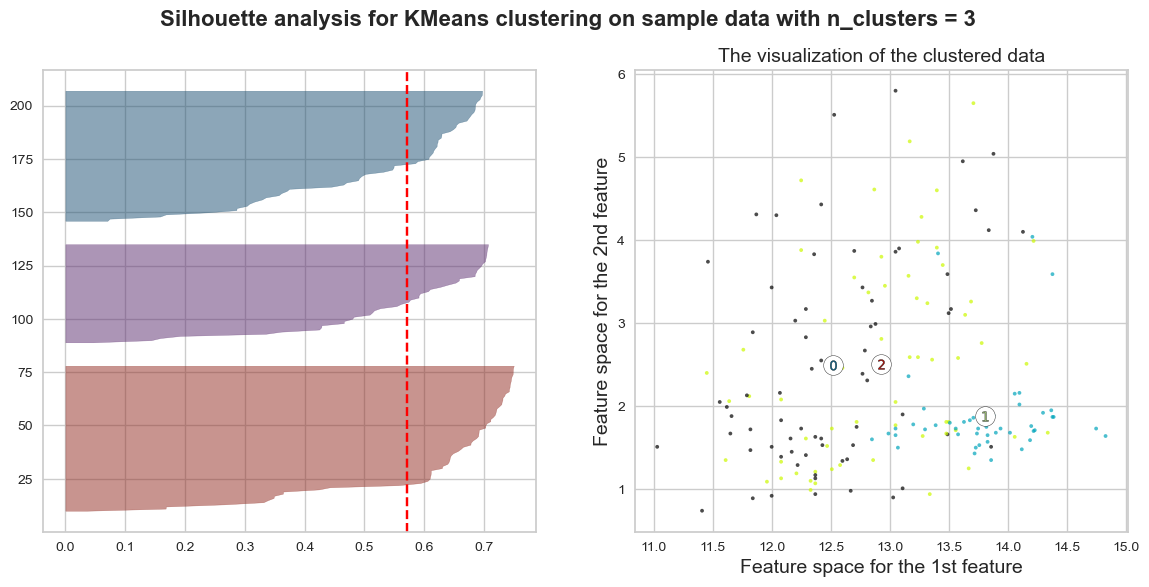

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
fig.set_size_inches(14, 6)

# First plot: Silhouette analysis
sil_visualizer1 = SilhouetteVisualizer(model_kmeans, ax=ax1, colors=['#922B21', '#5B2C6F', '#1B4F72'])
sil_visualizer1.fit(wine_data)

# Second plot: Actual clusters formed
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / model_kmeans.n_clusters)
ax2.scatter(wine_data.iloc[:, 0], wine_data.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data", fontsize=14)
ax2.set_xlabel("Feature space for the 1st feature", fontsize=14)
ax2.set_ylabel("Feature space for the 2nd feature", fontsize=14)

plt.suptitle("Silhouette analysis for KMeans clustering on sample data "
             "with n_clusters = %d" % model_kmeans.n_clusters, fontsize=16, fontweight='bold')

plt.show()